**Webscrapping - Analysing the cryptocurrencies by scarping data from coinmarketcap.com**

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib
import seaborn as sns
import numpy as np

**Using BeautifulSoup library to scrape data**

In [2]:
myUrl = 'https://coinmarketcap.com/'
sauce = urlopen(myUrl).read()
soup = BeautifulSoup(sauce, "lxml")

**Getting the Table of data which contains cryptocurrencies and capturing table data into respective variables**

In [3]:
tbody = soup.table.tbody
htmltable_rows = tbody.find_all('tr')

In [4]:
row = []
rank = []                    #List for rank of the currency (first column in the webpage)
currency_name = []           #List for name of the currency
market_cap = []              #List for market cap
price = []                   #List for price of the crypto currency
volume = []                  #List for Volume(24h)
supply = []                  #List for Circulating supply
change = [] 
for tr in htmltable_rows:
    td = tr.find_all('td')
    rank.append((td[0].text.split('\n'))[1])
    currency_name.append((td[1].text.split('\n'))[4])
    market_cap.append((td[2].text.split('\n'))[1])
    price.append((td[3].text.split('\n'))[1])
    volume.append((td[4].text.split('\n'))[1])
    supply.append((td[5].text.split('\n'))[2])
    change.append((td[6].text.split('\n'))[0])

**Constructing a DataFrame from the captured data from cryptocurrenct table**

In [5]:
 df = pd.DataFrame({
                         'rank' : rank,
                         'currency_name' : currency_name,
                         'market_cap' : market_cap,
                         'price' : price,
                         'volume' : volume,
                         'supply' : supply,
                         'change' : change
                         })

# Returning the data frame.

In [6]:
df['market_cap'] = df['market_cap'].map(lambda x: x.strip(' $'))
df['market_cap'] = df['market_cap'].map(lambda x: x.replace(',',''))
df['price'] = df['price'].map(lambda x: x.strip('$'))
df['price'] = df['price'].map(lambda x: x.replace(',',''))
df['volume'] = df['volume'].map(lambda x: x.strip('$'))
df['volume'] = df['volume'].map(lambda x: x.replace(',',''))
df['change'] = df['change'].map(lambda x: x.strip('%'))
df['supply'] = df['supply'].map(lambda x: x.replace(',',''))

In [7]:
df.market_cap = df.market_cap.astype(np.float64)
df.price = df.price.astype(np.float64)
df.volume = df.volume.astype(np.float64)
df.change = df.change.astype(np.float64)
df.supply = df.supply.astype(np.float64)
df['rank'] = df['rank'].astype(np.int64)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
rank             100 non-null int64
currency_name    100 non-null object
market_cap       100 non-null float64
price            100 non-null float64
volume           100 non-null float64
supply           100 non-null float64
change           100 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.5+ KB


In [9]:
mcap_df = df.sort_values('market_cap', ascending=False)

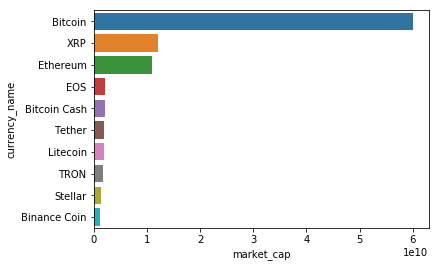

In [10]:
%matplotlib inline
mcap_df10 = mcap_df.iloc[:10]
sns.barplot(x='market_cap',y='currency_name',orient="h",data=mcap_df10)

**Note:If your y variable is categorical you can't draw a vertical barplot.**

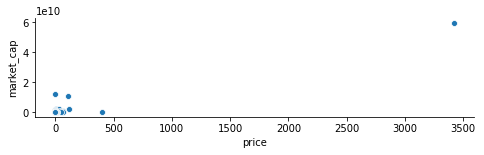

In [11]:
mcap_df50 = mcap_df.iloc[:50]
prmcap_df = mcap_df50.loc[:,('price','market_cap')]
ax = sns.pairplot(data=mcap_df50,kind='scatter',x_vars="price",y_vars="market_cap")
ax.fig.set_size_inches(10,2)


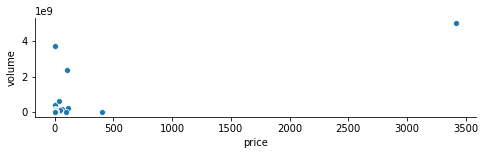

In [12]:
prvol_df = df.loc[:,('price','volume')]
axvol = sns.pairplot(data=prvol_df,kind='scatter',x_vars="price",y_vars="volume")
axvol.fig.set_size_inches(10,2)

In [13]:
change_df = df.sort_values(by='change', ascending=False)[:10]

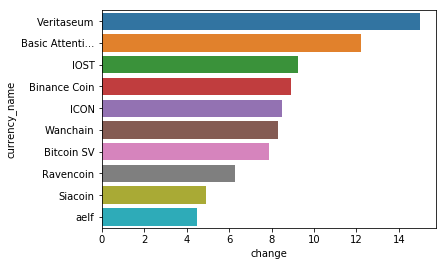

In [14]:
sns.barplot(data=change_df,orient="h",x="change",y="currency_name")